Arjun Bhan and Gabriel Acuña

Question #1

In [ ]:
import pandas as pd

In [ ]:
!wget http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz

--2021-11-14 18:33:45--  http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz
Resolving qwone.com (qwone.com)... 173.48.209.137
Connecting to qwone.com (qwone.com)|173.48.209.137|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14464277 (14M) [application/x-gzip]
Saving to: ‘20news-bydate.tar.gz.2’

20news-bydate.tar.g 100%[===================>]  13.79M  6.19MB/s    in 2.2s    

2021-11-14 18:33:48 (6.19 MB/s) - ‘20news-bydate.tar.gz.2’ saved [14464277/14464277]



In [ ]:
ls

20news-bydate.tar.gz    20news-bydate.tar.gz.2  20news-bydate-train/
20news-bydate.tar.gz.1  20news-bydate-test/     sample_data/


In [ ]:
!tar xvzf 20news-bydate.tar.gz

In [ ]:
!ls -lia 

total 42408
3801114 drwxr-xr-x  1 root root     4096 Nov 14 18:33 .
6686300 drwxr-xr-x  1 root root     4096 Nov 14 15:54 ..
6686257 -rw-r--r--  1 root root 14464277 Sep 22  2014 20news-bydate.tar.gz
6703765 -rw-r--r--  1 root root 14464277 Sep 22  2014 20news-bydate.tar.gz.1
6703766 -rw-r--r--  1 root root 14464277 Sep 22  2014 20news-bydate.tar.gz.2
6684673 drwxr-xr-x 22 6602 6602     4096 Mar 18  2003 20news-bydate-test
6692430 drwxr-xr-x 22 6602 6602     4096 Mar 18  2003 20news-bydate-train
5636112 drwxr-xr-x  4 root root     4096 Nov  1 13:34 .config
3801115 drwxr-xr-x  1 root root     4096 Nov  1 13:35 sample_data


In [ ]:
ls /content/20news-bydate-test/

alt.atheism/               rec.autos/           sci.space/
comp.graphics/             rec.motorcycles/     soc.religion.christian/
comp.os.ms-windows.misc/   rec.sport.baseball/  talk.politics.guns/
comp.sys.ibm.pc.hardware/  rec.sport.hockey/    talk.politics.mideast/
comp.sys.mac.hardware/     sci.crypt/           talk.politics.misc/
comp.windows.x/            sci.electronics/     talk.religion.misc/
misc.forsale/              sci.med/


Question #2-3

In [ ]:
import os, sys
import pandas as pd


In [ ]:
TrainData=[]
TrainPath = '/content/20news-bydate-train/'
for foldName in os.listdir(TrainPath):
    for fileName in os.listdir(TrainPath+'/'+foldName):
      filePath=TrainPath+'/'+foldName+'/'+fileName
      file=open(filePath,'r',encoding='latin1',errors='ignore')
      txt=file.read()
      file.close()
      record=(fileName,txt,foldName)
      TrainData.append(record)

In [ ]:
TrainDataFrame=pd.DataFrame(TrainData,columns=['Key','Information','Location'])
TrainDataFrame

,Key,Information,Location
0,104429,From: fisherg@egr.msu.edu (fisher greg)\nSubje...,rec.sport.baseball
1,104368,From: jerry@sheldev.shel.isc-br.com (Gerald La...,rec.sport.baseball
2,104932,From: roger@crux.Princeton.EDU (Roger Lustig)\...,rec.sport.baseball
3,104417,From: rjh@allegra.att.com (Robert Holt)\nSubje...,rec.sport.baseball
4,105147,From: gspira@nyx.cs.du.edu (Greg Spira)\nSubje...,rec.sport.baseball
...,...,...,...
11309,103188,From: jimf@centerline.com (Jim Frost)\nSubject...,rec.autos
11310,101634,From: jahonen@cc.lut.fi (Jarmo Ahonen)\nSubjec...,rec.autos
11311,101576,From: wdh@grouper.mkt.csd.harris.com (W. David...,rec.autos
11312,102886,From: garyl@moe.corollary.COM (Gary Lorman)\nS...,rec.autos


In [ ]:
TestData=[]
TestPath = '/content/20news-bydate-test/'
for foldName in os.listdir(TestPath):
    for fileName in os.listdir(TestPath+'/'+foldName):
      filePath=TestPath+'/'+foldName+'/'+fileName
      file=open(filePath,'r',encoding='latin1',errors='ignore')
      txt=file.read()
      file.close()
      record=(fileName,txt,foldName)
      TestData.append(record)

In [ ]:
TestDataFrame=pd.DataFrame(TestData,columns=['Key','Information','Location'])
TestDataFrame

,Key,Information,Location
0,104993,From: texdude@cs1.bradley.edu (Philip Allen)\n...,rec.sport.baseball
1,104652,From: snichols@adobe.com (Sherri Nichols)\nSub...,rec.sport.baseball
2,104885,From: J019800@LMSC5.IS.LMSC.LOCKHEED.COM\nSubj...,rec.sport.baseball
3,104969,From: craige@sad.hp.com (Craig Eid)\nSubject: ...,rec.sport.baseball
4,104984,"From: ""drew carley"" <drew.carley@canrem.com>\n...",rec.sport.baseball
...,...,...,...
7527,103660,From: Tom Wetzel <twetzel@ucs.indiana.edu>\nSu...,rec.autos
7528,103448,From: donald.wendel@yob.sccsi.com (Donald Wend...,rec.autos
7529,103176,From: pantera@uxa.cso.uiuc.edu (doddek david j...,rec.autos
7530,103809,From: rjwade@rainbow.ecn.purdue.edu (Robert J....,rec.autos


Question #4

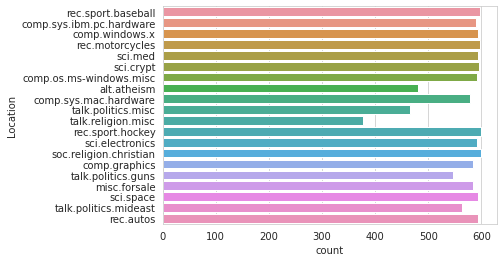

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(y='Location',data=TrainDataFrame);

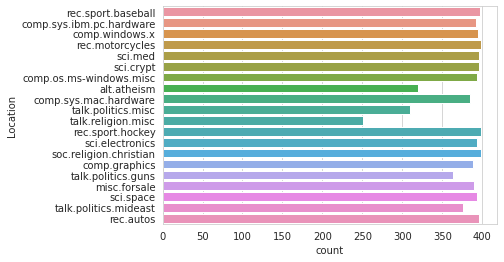

In [ ]:
sns.countplot(y='Location',data=TestDataFrame);

In [ ]:
TrainDataFrame.isnull().sum()

Key            0
Information    0
Location       0
dtype: int64

In [ ]:
TestDataFrame.isnull().sum()

Key            0
Information    0
Location       0
dtype: int64

In [ ]:
TrainDataFrame.shape

(11314, 3)

In [ ]:
TestDataFrame.shape

(7532, 3)

In [ ]:
TrainDataFrame.groupby('Location').count()

,Key,Information
Location,,
alt.atheism,480,480
comp.graphics,584,584
comp.os.ms-windows.misc,591,591
comp.sys.ibm.pc.hardware,590,590
comp.sys.mac.hardware,578,578
comp.windows.x,593,593
misc.forsale,585,585
rec.autos,594,594
rec.motorcycles,598,598


In [ ]:
TestDataFrame.groupby('Location').count()

,Key,Information
Location,,
alt.atheism,319,319
comp.graphics,389,389
comp.os.ms-windows.misc,394,394
comp.sys.ibm.pc.hardware,392,392
comp.sys.mac.hardware,385,385
comp.windows.x,395,395
misc.forsale,390,390
rec.autos,396,396
rec.motorcycles,398,398




```
Question #5 and #6

```



In [ ]:
y_Train=TrainDataFrame['Location']
X_Train=TrainDataFrame['Information']


In [ ]:
y_Test=TestDataFrame['Location']
X_Test=TestDataFrame['Information']

In [ ]:
len(X_Train), len(X_Test), len(y_Train), len(y_Test)

(11314, 7532, 11314, 7532)

In [ ]:
import re
import string
# Create a token pattern.  It is better to use re.compile, 
# as it will apply to multiple matches, which makes it faster
re_tok = re.compile('[^a-zA-Z]')
def tokenize(s): 
    return re_tok.sub(' ', s).split()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(tokenizer=tokenize)

In [ ]:
print(count_vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x7f61884e3b00>,
                vocabulary=None)


In [ ]:
tf_train= count_vect.fit_transform(X_Train)
tf_test = count_vect.transform(X_Test)

In [ ]:
tf_train.shape[1]

89038

In [ ]:
count_vect.get_feature_names()

['a',
 'aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg',
 'aaaaagggghhhh',
 'aaaarrgghhhh',
 'aaah',
 'aaahh',
 'aaahhhh',
 'aaai',
 'aab',
 'aacc',
 'aachen',
 'aacvkc',
 'aad',
 'aaef',
 'aaf',
 'aafc',
 'aah',
 'aai',
 'aaj',
 'aalac',
 'aalborg',
 'aaldoubo',
 'aalm',
 'aalternate',
 'aam',
 'aamazing',
 'aamir',
 'aammmaaaazzzzzziinnnnggggg',
 'aamrl',
 'aams',
 'aan',
 'aanbieden',
 'aanerud',
 'aangeboden',
 'aangegeven',
 'aangezien',
 'aanp',
 'aantal',
 'aao',
 'aaoepp',
 'aaos',
 'aap',
 'aaph',
 'aaplay',
 'aar',
 'aardvark',
 'aargh',
 'aarghhhh',
 'aarhus',
 'aario',
 'aarnet',
 'aaron',
 'aaronc',
 'aaronson',
 'aarp',
 'aarseth',
 'aarskog',
 'aart',
 'aas',
 'aasked',
 'aatchoo',
 'aau',
 'aauwpiugyv',
 'aav',
 'aavb',
 'aavso',
 'aaw',
 'aax',
 'aayau',
 'aazaadee',
 'aazo',
 'ab',
 'aba',
 'ababs',
 'abacus',
 'abad',
 'abaihm',
 'abandon',
 'abandond',
 'abandonded',
 'abandoned',
 'abandoning





7


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial', verbose=2, n_jobs=-1)

In [ ]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [ ]:
clf.fit(tf_train, y_Train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   40.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [ ]:
predictions=clf.predict(tf_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_Test, predictions)
print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")



Accuracy.........: 78.7440


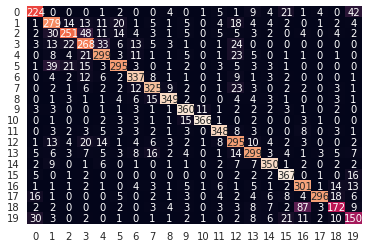

In [ ]:
cm = confusion_matrix(y_Test, predictions)
sns.heatmap(cm, annot=True,fmt='d',cbar=False);

#8

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [ ]:
Linclf = LinearSVC(random_state=0)

In [ ]:
Linclf.fit(tf_train, y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [ ]:
LinPrd=Linclf.predict(tf_test)
LinPrd[1:10]

array(['rec.sport.baseball', 'rec.sport.baseball', 'rec.autos',
       'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball',
       'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball'],
      dtype=object)

In [ ]:
y_Test
y_Test[1:10]

1    rec.sport.baseball
2    rec.sport.baseball
3    rec.sport.baseball
4    rec.sport.baseball
5    rec.sport.baseball
6    rec.sport.baseball
7    rec.sport.baseball
8    rec.sport.baseball
9    rec.sport.baseball
Name: Location, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_Test, LinPrd)
print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")



Accuracy.........: 78.5847


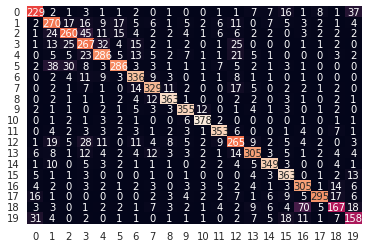

In [ ]:
cm = confusion_matrix(y_Test, LinPrd)
sns.heatmap(cm, annot=True,fmt='d',cbar=False);

Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NBclf = MultinomialNB()

In [ ]:
NBclf.fit(tf_train, y_Train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
NBpred=NBclf.predict(tf_test)

In [ ]:
NBpred

array(['rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball',
       ..., 'rec.autos', 'rec.autos', 'rec.autos'], dtype='<U24')

In [ ]:
y_Test

0       rec.sport.baseball
1       rec.sport.baseball
2       rec.sport.baseball
3       rec.sport.baseball
4       rec.sport.baseball
               ...        
7527             rec.autos
7528             rec.autos
7529             rec.autos
7530             rec.autos
7531             rec.autos
Name: Location, Length: 7532, dtype: object

In [ ]:
NBpred

array(['rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball',
       ..., 'rec.autos', 'rec.autos', 'rec.autos'], dtype='<U24')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_Test, NBpred)
print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")



Accuracy.........: 78.4785


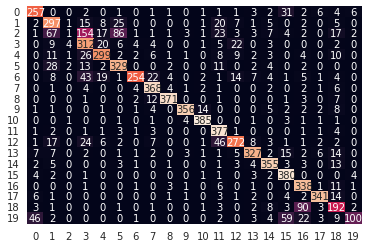

In [ ]:
cm = confusion_matrix(y_Test, NBpred)
sns.heatmap(cm, annot=True,fmt='d',cbar=False);

Question #9


In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.svm  import LinearSVC

param_grid = {'C': [0.1,  1, 10, 100] }
linearSVC = GridSearchCV(LinearSVC(),
                         param_grid,
                         cv=5,
                         scoring='accuracy', 
                         n_jobs= -1, 
                         verbose=3)
grid_fit= linearSVC.fit(tf_train,y_Train )

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
Grid_df= pd.DataFrame(linearSVC.cv_results_)
Grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,16.350289,1.846099,0.026833,0.003099,0.1,{'C': 0.1},0.883341,0.892620,0.889085,0.884224,0.881079,0.886070,0.004190,1
1,18.348679,0.845165,0.025981,0.000438,1,{'C': 1},0.877154,0.885992,0.873619,0.878038,0.879310,0.878823,0.004053,2
2,21.106279,1.222303,0.026816,0.001346,10,{'C': 10},0.875387,0.875829,0.863456,0.871852,0.871795,0.871663,0.004441,3
3,18.491870,1.030562,0.023597,0.005116,100,{'C': 100},0.873619,0.873619,0.861246,0.870084,0.870027,0.869719,0.004526,4


In [ ]:
print(grid_fit.best_params_)
print(grid_fit.best_score_)

{'C': 0.1}
0.8860699141574392


In [ ]:
predSVCGrid = grid_fit.predict(tf_test)

In [ ]:
print("Accuracy score = %s" %accuracy_score(y_Test, predSVCGrid))

Accuracy score = 0.7997875730217737


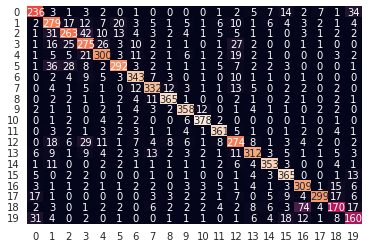

In [ ]:
cm = confusion_matrix(y_Test, predSVCGrid)
sns.heatmap(cm, annot=True,fmt='d',cbar=False);

Logistic Regression

In [ ]:
from sklearn.model_selection import  GridSearchCV

param_grid = {'C': [0.1,  1, 10, 100] }
logRegGridsearch = GridSearchCV(LogisticRegression(random_state= 0, solver= 'lbfgs', multi_class = 'multinomial', verbose= 2, n_jobs= -1),
                         param_grid,
                         cv=5,
                         scoring='accuracy', 
                         n_jobs= -1, 
                         verbose=3)
log_grid_fit= logRegGridsearch.fit(tf_train,y_Train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 11.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   40.1s finished


In [ ]:
Grid_df= pd.DataFrame(logRegGridsearch.cv_results_)
Grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,68.044277,0.753158,0.037256,0.004663,0.1,{'C': 0.1},0.871852,0.870526,0.864339,0.867875,0.860743,0.867067,0.004073,2
1,71.276840,2.072104,0.043997,0.006176,1,{'C': 1},0.863456,0.870526,0.870084,0.867875,0.863395,0.867067,0.003106,1
2,72.664054,1.951853,0.042716,0.007535,10,{'C': 10},0.866549,0.860362,0.865223,0.860362,0.863395,0.863178,0.002508,3
3,70.396311,3.482797,0.038060,0.012069,100,{'C': 100},0.863456,0.856385,0.859920,0.864339,0.863837,0.861588,0.003032,4


In [ ]:
print(log_grid_fit.best_params_)
print(log_grid_fit.best_score_)

{'C': 1}
0.8670670256496212


In [ ]:
logPredictions = log_grid_fit.predict(tf_test)

In [ ]:
print("Accuracy score = %s" %accuracy_score(y_Test, logPredictions))

Accuracy score = 0.7874402549123739


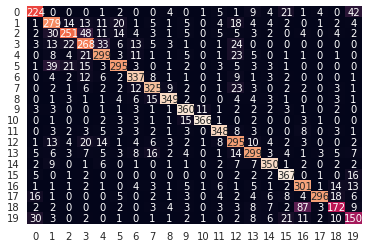

In [ ]:
cm = confusion_matrix(y_Test, logPredictions)
sns.heatmap(cm, annot=True,fmt='d',cbar=False);